In [16]:
import dynamiqs as dq
import numpy as np

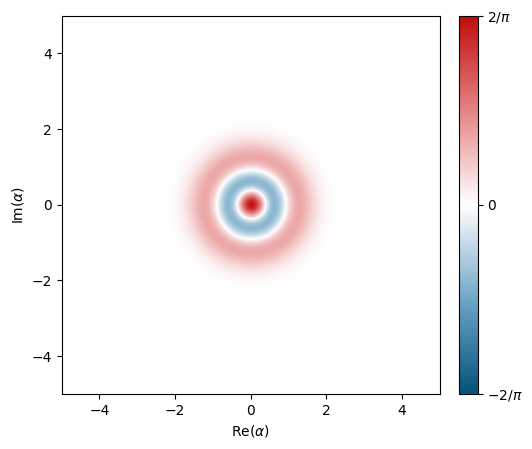

In [5]:
psi_Fock = dq.fock(3, 2)
dq.plot.wigner(psi_Fock)

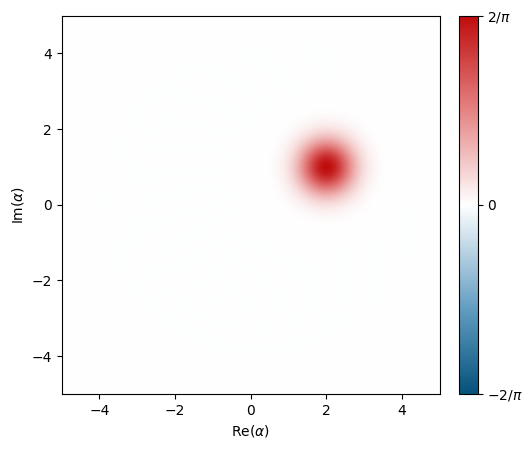

In [13]:
psi_coherent = dq.coherent(20, 2+1j)
dq.plot.wigner(psi_coherent)

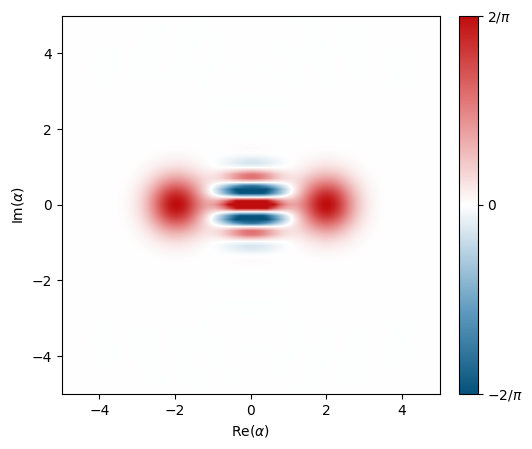

In [14]:
psi_cat = dq.coherent(30, 2) + dq.coherent(30, -2)
dq.plot.wigner(psi_cat)

In [18]:

# 1) Parameters
g2, epsb, kappa = 1.0, -4.0, 10.0
dim_a, dim_b    = 4, 4

# 2) Operators
a, b    = dq.destroy(dim_a, dim_b)
adag, bdag    = dq.create(dim_a, dim_b)

# 3) Hamiltonian   H = g2* a†² b + g2 a² b† + eps_b* b + eps_b b†
H = (
    np.conj(g2) * adag @ adag @ b +   # g2*  a†² b
    g2          * a    @ a    @ bdag + # g2   a²  b†
    np.conj(epsb) * b +               # ε_b* b
    epsb * bdag                        # ε_b  b†
)

# 4) Jump operators   √κ · b
jump_ops = [np.sqrt(kappa) * b]

# 5) Initial state  |0,0⟩⟨0,0|
#rho0 = dq.coherent_dm(4, 0.5)
rho0 = dq.tensor(dq.fock_dm(dim_a, 0), dq.fock_dm(dim_b, 0))

# 6) Time grid
tlist = np.linspace(0.0, 5.0, 501)

# 7) Observables
na, nb = dq.number(dim_a, dim_b)
e_ops  = [na, nb]

# 8) Solve ME — note the order!
result = dq.mesolve(
    H,             # Hamiltonian
    jump_ops,      # list of jump operators
    rho0,          # initial state
    tlist,         # times to save states/expectations
    exp_ops=e_ops  # optional expectation operators
)
dq.plot.wigner_gif(
    result.states,
    gif_duration=10.0,
    fps=25,
    xmax=4.0,
    clear=True
)

# --- save to disk --------------------------------------------------
#with open("wigner_evolution.gif", "wb") as f:
#    f.write(gif.data)     # gif.data is a bytes object

|██████████| 100.0% ◆ elapsed 8.47ms ◆ remaining 0.00ms
100%|██████████| 250/250 [00:03<00:00, 67.87it/s]
